### Import Libraries

In [20]:
import pandas as pd
import numpy as np

from sklearn.metrics import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie=pd.read_csv('..\\may 5 batch codes\\Data Files\\Movie.csv')
movie.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


### Data Understanding

In [3]:
movie.shape

(8992, 3)

In [4]:
movie.isna().sum()

userId    0
movie     0
rating    0
dtype: int64

In [5]:
movie.dtypes

userId      int64
movie      object
rating    float64
dtype: object

In [69]:
print(movie['userId'].unique())

[   3    6    8 ... 7080 7087 7105]


In [64]:
movie['userId'].nunique()

4081

In [68]:
print(movie['movie'].unique())

['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)'
 'Waiting to Exhale (1995)' 'Father of the Bride Part II (1995)'
 'Heat (1995)' 'Sabrina (1995)' 'Tom and Huck (1995)'
 'Sudden Death (1995)' 'GoldenEye (1995)']


In [67]:
movie['movie'].nunique()

10

### Data Preparation

In [6]:
movie_pivot=pd.pivot_table(data=movie,values='rating',index='movie',columns='userId').fillna(0)
movie_pivot.columns = movie['userId'].unique()
movie_pivot

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5


### Using Correlation Method

In [7]:
movie_corr=movie_pivot.corr().round(2)
movie_corr

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,1.00,-0.11,-0.11,-0.16,1.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,-0.11,-0.11,1.00,0.67,-0.17,-0.11,-0.17,-0.35,-0.11,0.48
6,-0.11,1.00,-0.11,-0.16,-0.11,0.28,0.67,0.56,-0.11,-0.16,...,-0.11,-0.11,-0.11,-0.17,-0.17,-0.11,-0.17,0.35,-0.11,-0.22
8,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,1.00,-0.11,0.67,-0.17,-0.11,0.72,0.35,1.00,0.57
10,-0.16,-0.16,-0.16,1.00,-0.16,-0.31,-0.25,0.48,-0.16,0.24,...,0.78,-0.16,-0.16,-0.25,0.99,-0.16,-0.25,0.48,-0.16,-0.32
11,1.00,-0.11,-0.11,-0.16,1.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,-0.11,-0.11,1.00,0.67,-0.17,-0.11,-0.17,-0.35,-0.11,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,-0.11,-0.11,-0.11,-0.16,-0.11,-0.21,-0.17,-0.27,-0.11,-0.16,...,-0.11,-0.11,-0.11,-0.17,-0.17,1.00,0.61,-0.35,-0.11,-0.22
7070,-0.17,-0.17,0.72,-0.25,-0.17,0.33,-0.25,0.13,0.72,0.58,...,-0.17,0.72,-0.17,0.42,-0.25,0.61,1.00,0.04,0.72,0.30
7080,-0.35,0.35,0.35,0.48,-0.35,0.54,0.40,0.81,0.35,0.41,...,0.18,0.35,-0.35,0.00,0.53,-0.35,0.04,1.00,0.35,0.14
7087,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,1.00,-0.11,0.67,-0.17,-0.11,0.72,0.35,1.00,0.57


In [9]:
movie_corr_100 = movie_corr.iloc[:100,:100]
movie_corr_100

,3,6,8,10,11,12,13,14,16,19,...,271,274,275,279,280,285,286,289,294,295
3,1.00,-0.11,-0.11,-0.16,1.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,1.00,-0.17,-0.11,0.40,-0.11,0.21,-0.21,-0.11,-0.11,0.28
6,-0.11,1.00,-0.11,-0.16,-0.11,0.28,0.67,0.56,-0.11,-0.16,...,-0.11,-0.17,-0.11,-0.31,-0.11,-0.02,-0.21,-0.11,-0.11,-0.21
8,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,1.00,1.00,-0.21
10,-0.16,-0.16,-0.16,1.00,-0.16,-0.31,-0.25,0.48,-0.16,0.24,...,-0.16,0.98,-0.16,0.24,0.78,0.45,0.17,-0.16,-0.16,0.89
11,1.00,-0.11,-0.11,-0.16,1.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,1.00,-0.17,-0.11,0.40,-0.11,0.21,-0.21,-0.11,-0.11,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.21,-0.02,-0.48,0.45,0.21,-0.21,0.14,0.01,-0.48,-0.34,...,0.21,0.49,-0.48,0.38,0.21,1.00,-0.20,-0.48,-0.48,0.56
286,-0.21,-0.21,0.74,0.17,-0.21,0.30,-0.31,0.41,0.74,0.86,...,-0.21,0.09,0.74,0.39,0.36,-0.20,1.00,0.74,0.74,0.02
289,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,1.00,1.00,-0.21
294,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,1.00,1.00,-0.21


In [14]:
np.fill_diagonal(a=movie_corr_100.values, val=0)
movie_corr_100

,3,6,8,10,11,12,13,14,16,19,...,271,274,275,279,280,285,286,289,294,295
3,0.00,-0.11,-0.11,-0.16,1.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,1.00,-0.17,-0.11,0.40,-0.11,0.21,-0.21,-0.11,-0.11,0.28
6,-0.11,0.00,-0.11,-0.16,-0.11,0.28,0.67,0.56,-0.11,-0.16,...,-0.11,-0.17,-0.11,-0.31,-0.11,-0.02,-0.21,-0.11,-0.11,-0.21
8,-0.11,-0.11,0.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,1.00,1.00,-0.21
10,-0.16,-0.16,-0.16,0.00,-0.16,-0.31,-0.25,0.48,-0.16,0.24,...,-0.16,0.98,-0.16,0.24,0.78,0.45,0.17,-0.16,-0.16,0.89
11,1.00,-0.11,-0.11,-0.16,0.00,-0.21,-0.17,-0.27,-0.11,-0.16,...,1.00,-0.17,-0.11,0.40,-0.11,0.21,-0.21,-0.11,-0.11,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.21,-0.02,-0.48,0.45,0.21,-0.21,0.14,0.01,-0.48,-0.34,...,0.21,0.49,-0.48,0.38,0.21,0.00,-0.20,-0.48,-0.48,0.56
286,-0.21,-0.21,0.74,0.17,-0.21,0.30,-0.31,0.41,0.74,0.86,...,-0.21,0.09,0.74,0.39,0.36,-0.20,0.00,0.74,0.74,0.02
289,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,0.00,1.00,-0.21
294,-0.11,-0.11,1.00,-0.16,-0.11,0.60,-0.17,0.40,1.00,0.86,...,-0.11,-0.17,1.00,0.40,-0.11,-0.48,0.74,1.00,0.00,-0.21


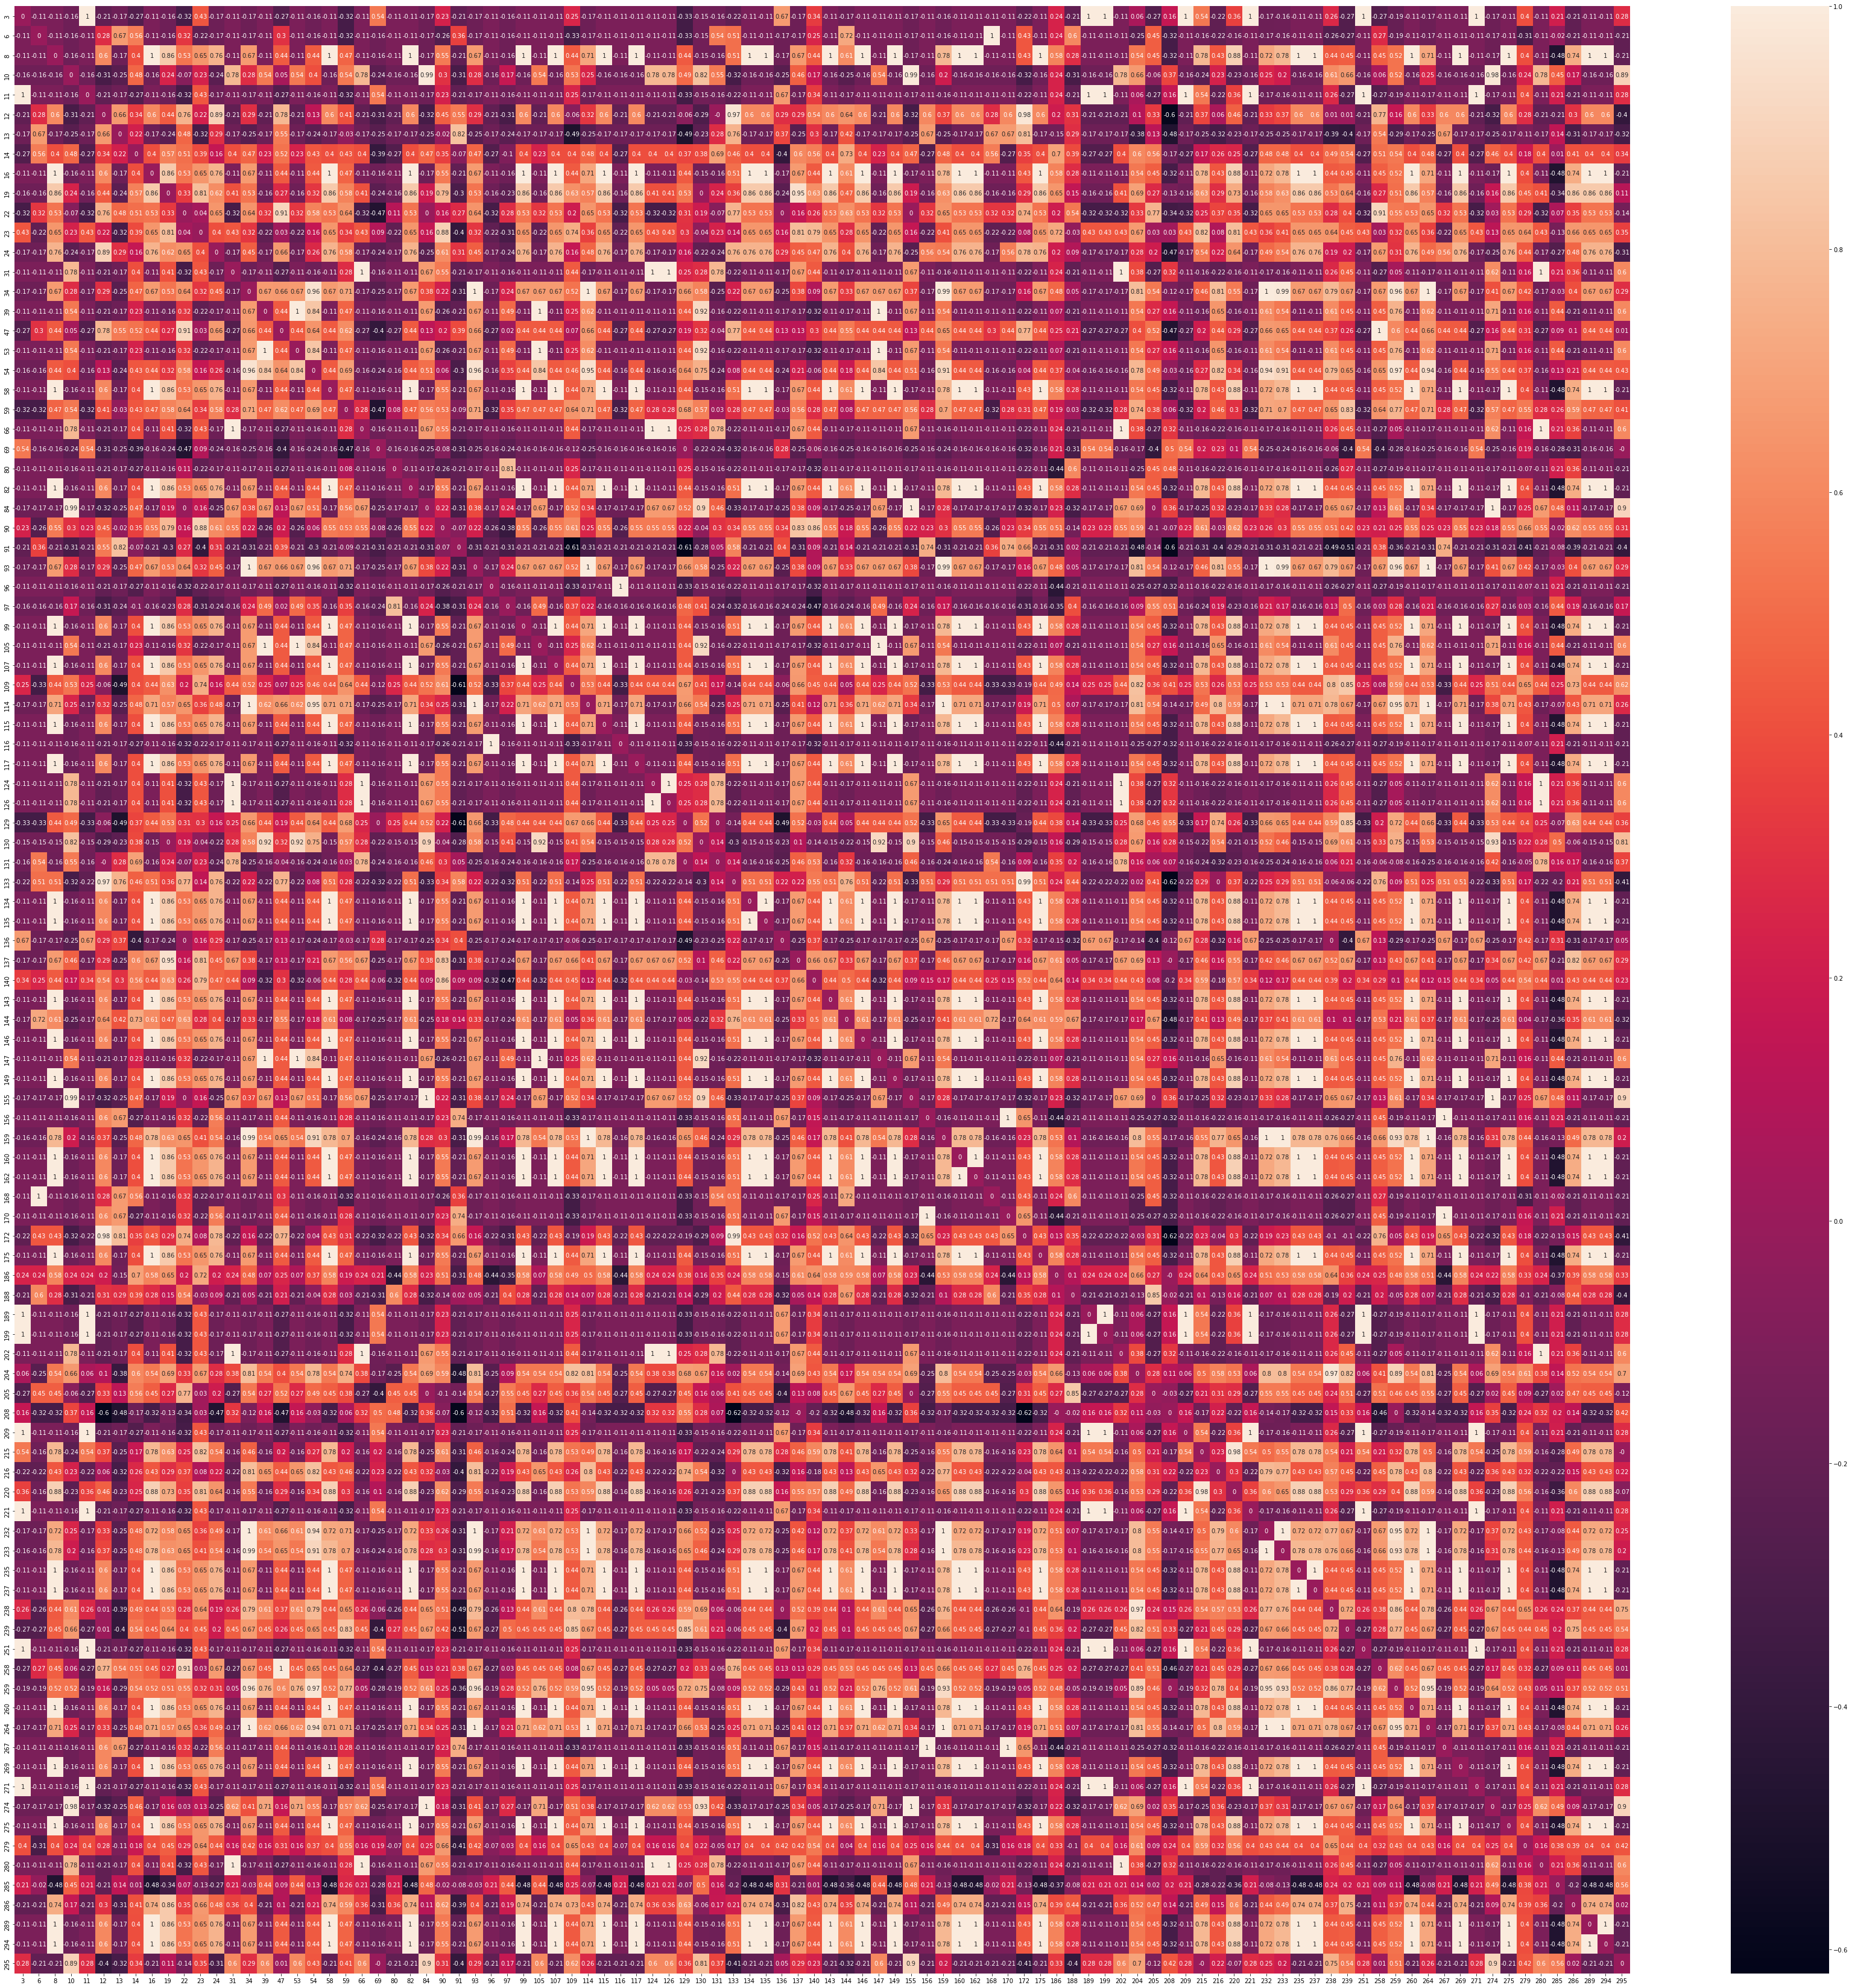

In [19]:
plt.figure(figsize=(60,60))
sns.heatmap(movie_corr_100,annot=True)
plt.show()

In [71]:
movie[movie['userId']==3]

,userId,movie,rating
0,3,Toy Story (1995),4.0


In [73]:
movie[movie['userId']==11]

,userId,movie,rating
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [79]:
movie[(movie['userId']==6993) | (movie['userId']==3) | (movie['userId']==11)]

,userId,movie,rating
0,3,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5
8964,6993,GoldenEye (1995),4.5


In [80]:
movie[(movie['userId'] == 8) | (movie['userId'] == 16) | (movie['userId'] == 6979)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
8,16,Toy Story (1995),3.0
3727,8,Grumpier Old Men (1995),5.0
5205,8,Heat (1995),3.0
5207,16,Heat (1995),3.0
7445,8,GoldenEye (1995),4.0
8963,6979,GoldenEye (1995),4.0


### Using Euclidean Method

In [33]:
movie_pivot_euclidean=pd.pivot_table(data=movie,values='rating',index='userId',columns='movie').fillna(0)
movie_pivot_euclidean.index=movie['userId'].unique()
movie_pivot_euclidean

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
3,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7044,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7080,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0
7087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [60]:
euclidean_pairwise=pairwise_distances(X=movie_pivot_euclidean,metric='euclidean')
euclidean_pairwise.shape

(4081, 4081)

In [61]:
euclidean_pairwise_df=pd.DataFrame(data=euclidean_pairwise)
euclidean_pairwise_df.index=movie['userId'].unique()
euclidean_pairwise_df.columns=movie['userId'].unique()
euclidean_pairwise_df.round(2)

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.00,5.32,5.32,6.10,0.50,8.44,5.50,8.85,5.32,6.22,...,4.03,5.32,1.50,4.03,5.50,5.32,6.36,9.39,6.10,6.04
6,5.32,0.00,5.66,6.40,5.00,7.14,3.16,6.48,5.66,6.52,...,4.47,5.66,4.47,6.93,5.83,5.66,6.65,7.75,6.40,8.26
8,5.32,5.66,0.00,6.40,5.00,5.92,5.83,7.07,0.00,2.55,...,4.47,0.00,4.47,4.00,5.83,5.66,3.50,7.75,1.00,5.68
10,6.10,6.40,6.40,0.00,5.83,9.17,6.56,6.40,6.40,5.61,...,3.61,6.40,5.39,7.55,1.00,6.40,7.30,6.86,7.07,8.79
11,0.50,5.00,5.00,5.83,0.00,8.25,5.20,8.66,5.00,5.96,...,3.61,5.00,1.00,4.12,5.20,5.00,6.10,9.22,5.83,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,5.32,5.66,5.66,6.40,5.00,8.66,5.83,9.06,5.66,6.52,...,4.47,5.66,4.47,6.93,5.83,0.00,4.03,9.59,6.40,8.26
7070,6.36,6.65,3.50,7.30,6.10,6.87,6.80,7.89,3.50,4.33,...,5.68,3.50,5.68,5.32,6.80,4.03,0.00,8.50,3.64,6.67
7080,9.39,7.75,7.75,6.86,9.22,6.40,7.21,4.00,7.75,7.18,...,8.25,7.75,8.94,8.72,6.78,9.59,8.50,0.00,7.81,8.26
7087,6.10,6.40,1.00,7.07,5.83,5.83,6.56,7.14,1.00,2.55,...,5.39,1.00,5.39,4.12,6.56,6.40,3.64,7.81,0.00,5.68


### Using Cosine Metrics

In [42]:
movie_pivot_cosine=pd.pivot_table(data=movie,values='rating',index='userId',columns='movie').fillna(0)
movie_pivot_cosine.index=movie['userId'].unique()
movie_pivot_cosine

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
3,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7044,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7070,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7080,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0
7087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [52]:
cosine_pairwise=1-pairwise_distances(X=movie_pivot_cosine,metric='cosine')
cosine_pairwise.shape

(4081, 4081)

In [53]:
cosine_pairwise_df=pd.DataFrame(data=cosine_pairwise)
cosine_pairwise_df.index=movie['userId'].unique()
cosine_pairwise_df.columns=movie['userId'].unique()
cosine_pairwise_df.round(2)

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.71,0.00,0.00,0.00,0.00,0.00,0.55
6,0.00,1.00,0.00,0.00,0.00,0.39,0.71,0.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.00,0.00
8,0.00,0.00,1.00,0.00,0.00,0.65,0.00,0.49,1.00,0.87,...,0.00,1.00,0.00,0.71,0.00,0.00,0.75,0.46,1.00,0.62
10,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.62,0.00,0.39,...,0.80,0.00,0.00,0.00,0.99,0.00,0.00,0.62,0.00,0.00
11,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.71,0.00,0.00,0.00,0.00,0.00,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.66,0.00,0.00,0.00
7070,0.00,0.00,0.75,0.00,0.00,0.49,0.00,0.37,0.75,0.66,...,0.00,0.75,0.00,0.53,0.00,0.66,1.00,0.35,0.75,0.47
7080,0.00,0.46,0.46,0.62,0.00,0.70,0.57,0.89,0.46,0.57,...,0.34,0.46,0.00,0.32,0.65,0.00,0.35,1.00,0.46,0.48
7087,0.00,0.00,1.00,0.00,0.00,0.65,0.00,0.49,1.00,0.87,...,0.00,1.00,0.00,0.71,0.00,0.00,0.75,0.46,1.00,0.62


### End